Version 1.0.3

# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 


In [4]:
DATA_FOLDER = '../data/'

transactions    = pd.read_csv(os.path.join(os.getcwd(), DATA_FOLDER, 'sales_train_v2.csv'))
items           = pd.read_csv(os.path.join(os.getcwd(), DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(os.getcwd(), DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(os.getcwd(), DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [5]:
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
# YOUR CODE GOES HERE
item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [7]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with strings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [8]:
transactions['month'] = transactions.date.apply(lambda x: x.split(".")[1])
transactions['day'] = transactions.date.apply(lambda x: x.split(".")[0])
transactions['year'] = transactions.date.apply(lambda x: x.split(".")[2])
transactions['day_revenue'] = transactions.item_price * transactions.item_cnt_day

In [9]:
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,day,year,day_revenue
0,02.01.2013,0,59,22154,999.00,1.0,01,02,2013,999.00
1,03.01.2013,0,25,2552,899.00,1.0,01,03,2013,899.00
2,05.01.2013,0,25,2552,899.00,-1.0,01,05,2013,-899.00
3,06.01.2013,0,25,2554,1709.05,1.0,01,06,2013,1709.05
4,15.01.2013,0,25,2555,1099.00,1.0,01,15,2013,1099.00


In [10]:
sept_revenue = transactions[(transactions.month == "09") & (transactions.year == "2014")].groupby(transactions.shop_id).day_revenue.sum()

In [11]:
sept_revenue_df = sept_revenue.to_frame().reset_index()

In [12]:
max_revenue = sept_revenue_df.loc[sept_revenue_df.day_revenue.idxmax()].day_revenue

Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [13]:
summer_trans = transactions[(transactions.month >= "06") & (transactions.month <= "08") & (transactions.year == "2014")]
summer_trans_cat = pd.merge(summer_trans, items, 'left')

In [14]:
summer_trans_cat.groupby(summer_trans_cat.item_category_id).day_revenue.sum().argmax()

15

In [15]:
category_id_with_max_revenue = summer_trans_cat.groupby(summer_trans_cat.item_category_id).day_revenue.sum().argmax()

<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [16]:
price_changed = transactions.groupby(transactions.item_id).item_price.unique().apply(len).to_frame().reset_index()

In [17]:
len(price_changed[price_changed.item_price == 1])

5926

In [18]:
num_items_constant_price = len(price_changed[price_changed.item_price == 1])

Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014? Do not count the items, that were sold but returned back later.</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`). 
* If there were no sales at a given day, ***do not*** impute missing value with zero, just ignore that day

In [19]:
shop_id = 25

In [20]:
shop_december = transactions[(transactions.month == "12") & (transactions.year == "2014") & (transactions.shop_id == shop_id)]

In [21]:
shop_december

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month,day,year,day_revenue
2295837,14.12.2014,23,25,21752,399.0,1.0,12,14,2014,399.0
2295838,13.12.2014,23,25,21752,399.0,3.0,12,13,2014,1197.0
2295839,26.12.2014,23,25,21733,149.0,1.0,12,26,2014,149.0
2295840,31.12.2014,23,25,21732,149.0,1.0,12,31,2014,149.0
2295841,30.12.2014,23,25,21726,149.0,1.0,12,30,2014,149.0
...,...,...,...,...,...,...,...,...,...,...
2323418,11.12.2014,23,25,5037,2599.0,1.0,12,11,2014,2599.0
2323419,28.12.2014,23,25,5037,1999.0,2.0,12,28,2014,3998.0
2323420,03.12.2014,23,25,5038,2999.0,1.0,12,03,2014,2999.0
2323421,06.12.2014,23,25,5033,1199.0,1.0,12,06,2014,1199.0


In [22]:
december_sold = shop_december.groupby(shop_december.day).item_cnt_day.sum()

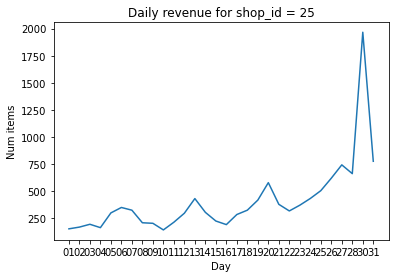

In [23]:
total_num_items_sold = december_sold.values
days = december_sold.keys()

# Plot it
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = np.var(total_num_items_sold, ddof=1)


Well done! :)